In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install imbalanced-learn
from collections import Counter
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing

from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

In [108]:
df=pd.read_csv('Raw data.csv')
df.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [109]:
df.shape

(252000, 13)

In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


Exploratory data analysis

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

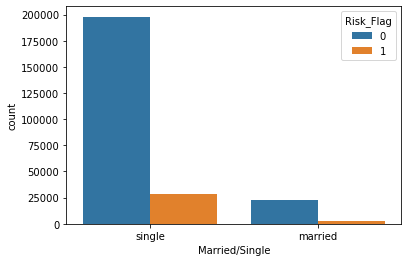

In [111]:
df['Married/Single'].value_counts()
sns.countplot(data= df, x= 'Married/Single', hue='Risk_Flag')

<AxesSubplot:xlabel='House_Ownership', ylabel='count'>

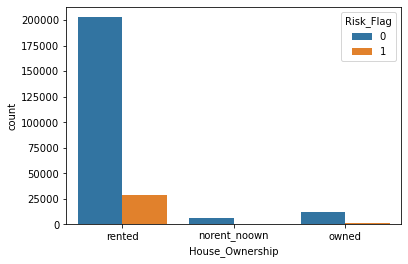

In [112]:
df['House_Ownership'].value_counts()
sns.countplot(data= df, x= 'House_Ownership', hue='Risk_Flag')

<AxesSubplot:xlabel='Car_Ownership', ylabel='count'>

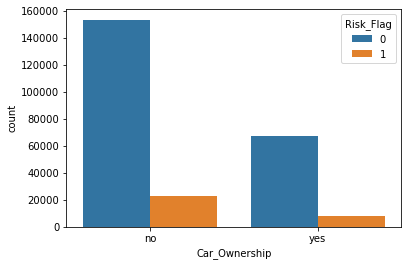

In [113]:
df['Car_Ownership'].value_counts()
sns.countplot(data= df, x= 'Car_Ownership', hue='Risk_Flag')

# Imbalance in Raw Data

<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

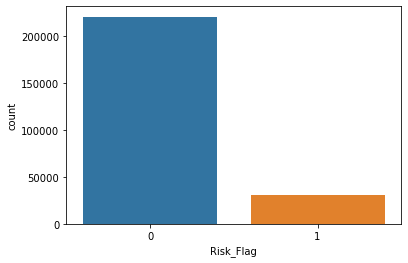

In [114]:
df['Risk_Flag'].value_counts()
sns.countplot(data= df, x= 'Risk_Flag')

In [115]:
#checking for null values

In [116]:
df.isnull().values.any()

False

In [117]:
not_risk,risk=df.Risk_Flag.value_counts()
df_risk=df[df.Risk_Flag==1]
df_not_risk=df[df.Risk_Flag==0]

In [118]:
risk,not_risk

(30996, 221004)

# Encoding

Using label encoder to convert string to numerical data

In [120]:
encoder = preprocessing.LabelEncoder()
df['Married/Single']= encoder.fit_transform(df['Married/Single'])
print(df['Married/Single'].unique())

[1 0]


In [121]:
encoder = preprocessing.LabelEncoder()
df['House_Ownership']= encoder.fit_transform(df['House_Ownership'])
print(df['House_Ownership'].unique())

[2 0 1]


In [122]:
encoder = preprocessing.LabelEncoder()
df['Car_Ownership']= encoder.fit_transform(df['Car_Ownership'])
print(df['Car_Ownership'].unique())

[0 1]


In [123]:
encoder = preprocessing.LabelEncoder()
df['Profession']= encoder.fit_transform(df['Profession'])
print(df['Profession'].unique())

[33 43 47 11 31 20 25  2 18 37 23  0 39 38  4 46 17  9 28 16 12  6 27 13
 36 42 14  7 48 34 22  5 40 32 30 24 21 35  1 26 19 44 50 15  8  3 45 41
 10 29 49]


In [124]:
encoder = preprocessing.LabelEncoder()
df['STATE']= encoder.fit_transform(df['STATE'])
print(df['STATE'].unique())

[13 14 12 17 22  6 20 23  2  0 28  7 18 11 25  8 19 24 27 10 16  1  9  5
  4  3 26 15 21]


In [125]:
df

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,1,2,0,33,Rewa,13,3,13,0
1,2,7574516,40,10,1,2,0,43,Parbhani,14,9,13,0
2,3,3991815,66,4,0,2,0,47,Alappuzha,12,4,10,0
3,4,6256451,41,2,1,2,1,43,Bhubaneswar,17,2,12,1
4,5,5768871,47,11,1,2,0,11,Tiruchirappalli[10],22,3,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
251995,251996,8154883,43,13,1,2,0,45,Kolkata,28,6,11,0
251996,251997,2843572,26,10,1,2,0,3,Rewa,13,6,11,0
251997,251998,4522448,46,7,1,2,0,17,Kalyan-Dombivli,14,7,12,0
251998,251999,6507128,45,0,1,2,0,27,Pondicherry,18,0,10,0


Dropping Id as its unnecessary, and City and State as it has too many unique values and some bad data

In [126]:
df= df.drop(['Id','CITY','STATE'], axis=1)

Finding the correlation of independent variables with dependent variables using a heat map.

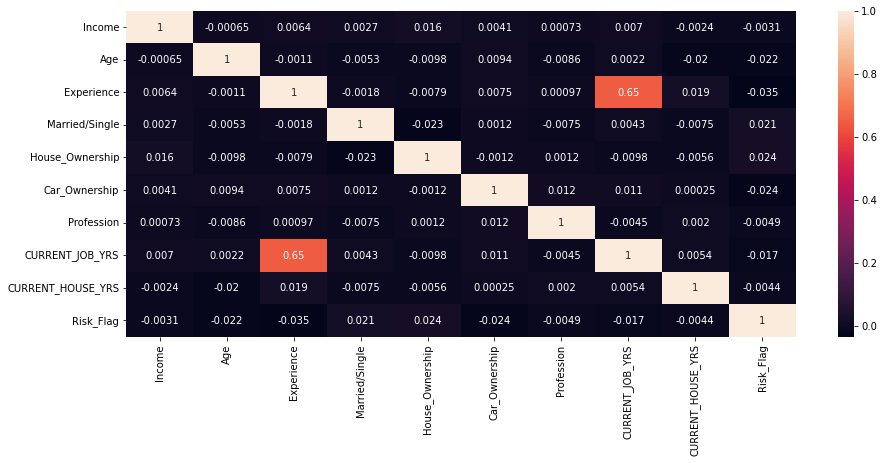

In [128]:
import matplotlib.pyplot as plt
M_correlation = plt.figure(figsize = (15, 6))
sns.heatmap(df.corr(),annot=True);

In [129]:
iv = df.drop('Risk_Flag', axis=1)
dv =df['Risk_Flag']

Oversampling the dataset with 'RandomOverSampler' balancing technique.

In [130]:
Randomoversampling = RandomOverSampler(random_state =0)
iv_resampled, dv_resampled = Randomoversampling.fit_resample(iv, dv)
print(sorted(Counter(dv_resampled).items()),dv_resampled.shape)

[(0, 221004), (1, 221004)] (442008,)


In [131]:
dv_resampled.to_csv('dvresampled.csv',index=False)

In [132]:
iv_resampled.to_csv('ivresampled.csv',index=False)

In [133]:
df = pd.merge(iv_resampled, dv_resampled, left_index=True, right_index=True)

In [134]:
df

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,1,2,0,33,3,13,0
1,7574516,40,10,1,2,0,43,9,13,0
2,3991815,66,4,0,2,0,47,4,10,0
3,6256451,41,2,1,2,1,43,2,12,1
4,5768871,47,11,1,2,0,11,3,14,1
...,...,...,...,...,...,...,...,...,...,...
442003,4514928,28,20,1,2,1,43,5,11,1
442004,430010,26,12,1,0,1,28,10,10,1
442005,8437491,22,2,1,2,0,29,2,14,1
442006,4528867,40,4,0,2,0,12,4,10,1


In [135]:
df.to_csv('balanced.csv')

Balanced dataset

<AxesSubplot:xlabel='Risk_Flag', ylabel='count'>

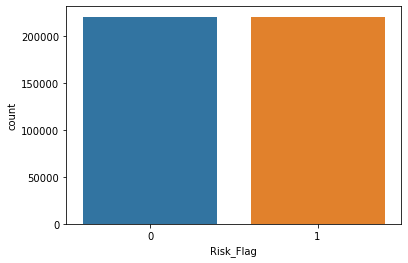

In [137]:
df['Risk_Flag'].value_counts()
sns.countplot(data= df, x= 'Risk_Flag')

# Splitting Data

In [138]:
iv_train, iv_test, dv_train, dv_test= train_test_split(iv,dv, test_size=0.20)
print(iv_train.shape)
print(iv_test.shape)
print(dv_train.shape)
print(dv_test.shape)

(201600, 9)
(50400, 9)
(201600,)
(50400,)


# Logistic Regression

In [139]:
lr = LogisticRegression()
lr.fit(iv_train,dv_train)

LogisticRegression()

In [140]:
dv_test.shape

(50400,)

In [141]:
dv_pred= lr.predict(iv_test)
print(classification_report(dv_test,dv_pred))

              precision    recall  f1-score   support

           0       0.88      1.00      0.93     44203
           1       0.00      0.00      0.00      6197

    accuracy                           0.88     50400
   macro avg       0.44      0.50      0.47     50400
weighted avg       0.77      0.88      0.82     50400



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [142]:
dv_test.shape, dv_pred.shape

((50400,), (50400,))

In [143]:
print(confusion_matrix(dv_test, dv_pred))

[[44203     0]
 [ 6197     0]]


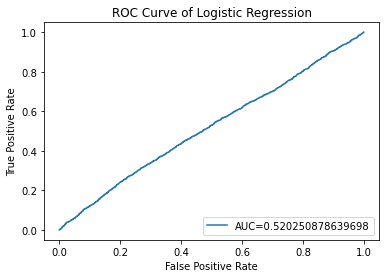

In [144]:
#defining metrics
dv_pred_proba = lr.predict_proba(iv_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(dv_test,  dv_pred_proba)
auc = metrics.roc_auc_score(dv_test, dv_pred_proba)

#create ROC curve
plt.title('ROC Curve of Logistic Regression')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Random Forests

In [145]:
rf = RandomForestClassifier(n_estimators = 350, max_depth = 5, oob_score = True, random_state = 0)
rf.fit(iv_train,dv_train)

RandomForestClassifier(max_depth=5, n_estimators=350, oob_score=True,
                       random_state=0)

In [49]:
print(classification_report(dv_pred,dv_test))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93     75600
           1       0.00      0.00      0.00         0

    accuracy                           0.88     75600
   macro avg       0.50      0.44      0.47     75600
weighted avg       1.00      0.88      0.93     75600



C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [51]:
print(confusion_matrix(dv_test, dv_pred))

[[66258     0]
 [ 9342     0]]


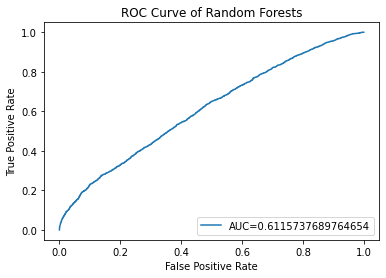

In [52]:
#defining metrics
dv_pred_proba = rf.predict_proba(iv_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(dv_test,  dv_pred_proba)
auc = metrics.roc_auc_score(dv_test, dv_pred_proba)

#create ROC curve
plt.title('ROC Curve of Random Forests')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()